In [33]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.layers \
    import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.python.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

# LOAD DATASET
train = pd.read_csv('../dataset/sign_mnist_train.csv')
test  = pd.read_csv('../dataset/sign_mnist_test.csv')
# mirsad_test = pd.read_csv('../dataset/sign_mnist_test_mirsad.csv')
sebastian_test = pd.read_csv('../dataset/sign_mnist_test_sebastian.csv')
# mariia_test = pd.read_csv('../dataset/sign_mnist_test_mariia.csv')

# DATA FOR FURTHER PROCESSING
# take only the 'label' column
y_train = train['label']
y = y_test = test['label']
# y_test_mirsad = mirsad_test['label']
y_test_sebastian = sebastian_test['label']
# y_test_mariia = mariia_test['label']
# categorize / binarize it
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)
# y_test_mirsad = label_binarizer.fit_transform(y_test_mirsad)
y_test_sebastian = label_binarizer.fit_transform(y_test_sebastian)
# y_test_mariia = label_binarizer.fit_transform(y_test_mariia)
# drop the 'label' column
x_train = train.drop(labels='label', axis=1)
x_test = test.drop(labels='label', axis=1)
# x_test_mirsad = mirsad_test.drop(labels='label', axis=1)
x_test_sebastian = sebastian_test.drop(labels='label', axis=1)
# x_test_mariia = mariia_test.drop(labels='label', axis=1)

# get the underlying ndarray
x_train = x_train.values
x_test = x_test.values
# x_test_mirsad = x_test_mirsad.values
x_test_sebastian = x_test_sebastian.values
# x_test_mariia = x_test_mariia.values
# normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
# x_test_mirsad = x_test_mirsad / 255.0
x_test_sebastian = x_test_sebastian / 255.0
# x_test_mariia = x_test_mariia / 255.0
# reshape them to be 28x28x1 image-like
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# x_test_mirsad = x_test_mirsad.reshape(-1, 28, 28, 1)
x_test_sebastian = x_test_sebastian.reshape(-1, 28, 28, 1)
# x_test_mariia = x_test_mariia.reshape(-1, 28, 28, 1)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
data_generator = ImageDataGenerator(rotation_range=10,
                                    zoom_range=0.10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)
save_plots = False

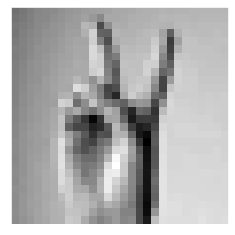

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


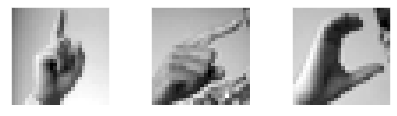

In [34]:
plt.tight_layout()
# plt.figure().set_size_inches(5, 5)
plt.imshow(x_train[21], cmap="gray")
axes = plt.gca()
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)
if save_plots:
    plt.savefig('../plots/input_image.png',
                dpi=300,
                format='png',
                transparent=True,
                bbox_inches='tight')
plt.show()

# display first 3 images
train.head(3)


f, ax = plt.subplots(1, 3)
# f.set_size_inches(5, 10)

plt.tight_layout()

for i in range(3):
    ax[i].imshow(x_train[i], cmap="gray")
    print(y_train[i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
if save_plots:
    plt.savefig('../plots/input_first_three.png',
                dpi=300,
                format='png',
                transparent=True,
                bbox_inches='tight')

# print('unique values:', set(train['label'].values))
# print('min: {}, max: {}'.format(train['label'].values.min(),
#                                 train['label'].values.max()))

In [35]:
model = Sequential([
    # 2D convolution layer
    Conv2D(filters=32,  # number of neurons, found out through experiments
           kernel_size=(5, 5),
           strides=(1, 1),
           padding='valid', # no padding
           activation='relu',
           input_shape=(28, 28, 1), # first layer in model
                                    # (height x width x channels)
           data_format='channels_last',
           name='input_layer'),
    # use max pooling since we want to extract the most salient features
    # rather than average features
    MaxPool2D(pool_size=(2, 2),
              strides=(2, 2),
              padding='valid', # no padding
              name='max_pool_1'),
    Dropout(rate=0.3,
            seed=None,
            name='dropout_1'),

    Conv2D(filters=64,
           kernel_size=(5, 5),
           strides=(1, 1),
           padding='valid',
           activation='relu',
           name='second_conv2D'),
    MaxPool2D(pool_size=(2, 2),
              strides=(2, 2),
              padding='valid',
              name='max_pool_2'),
    Dropout(rate=0.3,
            seed=None,
            name='dropout_2'),

    Flatten(name='flatten'),
    Dense(units=128, activation='relu', name='dense'),
    Dropout(rate=0.3,
            seed=None,
            name='dropout_3'),
    Dense(units=24,
          activation='softmax',
          name='output_layer')
])
model._name="Sign_MNIST_CNN"
model.summary() # print model summary
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print('model.submodules[0].input_shape:', model.submodules[0].input_shape)
# print('model.metrics_names:', model.metrics_names)

if save_plots:
    plot_model(model,
               to_file='../plots/model_plot.png',
               show_shapes=True,
               show_layer_names=False,
               rankdir='TB',
               dpi=200)

Model: "Sign_MNIST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 24, 24, 32)        832       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
second_conv2D (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)           

In [36]:
# print(len(x_train))
# print(len(x_train[0]))

# if set to 0.2 that means that 20% of training data will be used in
# evaluation set
x_train2, x_val, y_train2, y_val = \
    train_test_split(x_train,
                     y_train,
                     test_size=0.2,
                     # random_state=42, # only for testing
                     # shuffle=False) # only for testing
                     )

In [37]:
# TRAINING

# without data augmentation
# history = model.fit(x_train2,
#                     y_train2,
#                     batch_size=64, # maybe change to 64!?
#                     epochs=10,
#                     validation_data=(x_val, y_val),
#                     callbacks=[annealer],
#                     verbose=1)

# with data augmentation
history = model.fit(data_generator.flow(x_train2, y_train2, batch_size=64),
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[annealer],
                    verbose=1)

print("\nTrain accuracy={}, Validation accuracy={}\n".format(
        max(history.history['accuracy']), max(history.history['val_accuracy'])))

# results = model.evaluate(x_test, y_test, verbose=1)
# results = model.evaluate(x_test_mirsad, y_test_mirsad, verbose=1)
results = model.evaluate(x_test_sebastian, y_test_sebastian, verbose=1)
# results = model.evaluate(x_test_mariia, y_test_mariia, verbose=1)
print("\ntest loss, test acc:", results)

Epoch 1/10
344/344 [==============================] - 4s 12ms/step - loss: 2.8243 - accuracy: 0.1486 - val_loss: 0.8896 - val_accuracy: 0.7567

[[7.9372734e-01 7.5548481e-14 2.3447092e-13 2.0253488e-09 4.0914319e-10
  3.7113643e-09 3.0014767e-12 3.8802500e-06 1.1170411e-02 7.1926709e-09
  1.7983650e-07 3.4280692e-08 1.7808360e-03 1.2330758e-11 5.2151561e-10
  2.1391832e-16 8.9149097e-09 9.0153235e-06 3.5802021e-09 2.1495118e-11
  2.1122570e-09 1.8495364e-09 2.1180189e-12 1.9330831e-01]]
0


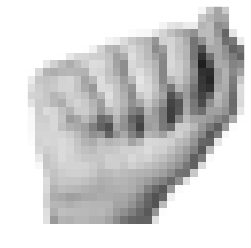

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("asl_a_cropped.jpg").resize((28, 28)).convert('LA')
img = img.convert('P')
img.save('greyscale.png')
imgplot2 = plt.imshow(img)

data = list(img.getdata()) # convert image data to a list of integers
data = [pixel / 255 for pixel in data]
data = np.array(data)
data = data.reshape(-1,28, 28, 1)

# print(data.shape)
# print(data)
# print(len(data))
print(model.predict(data))
print(np.argmax(model.predict(data)))

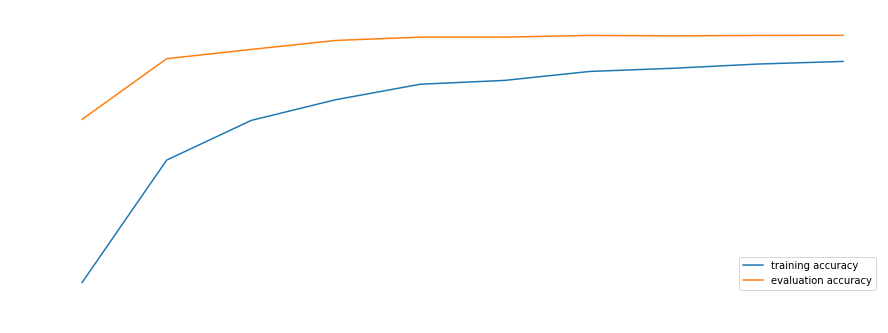

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.95      0.97       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

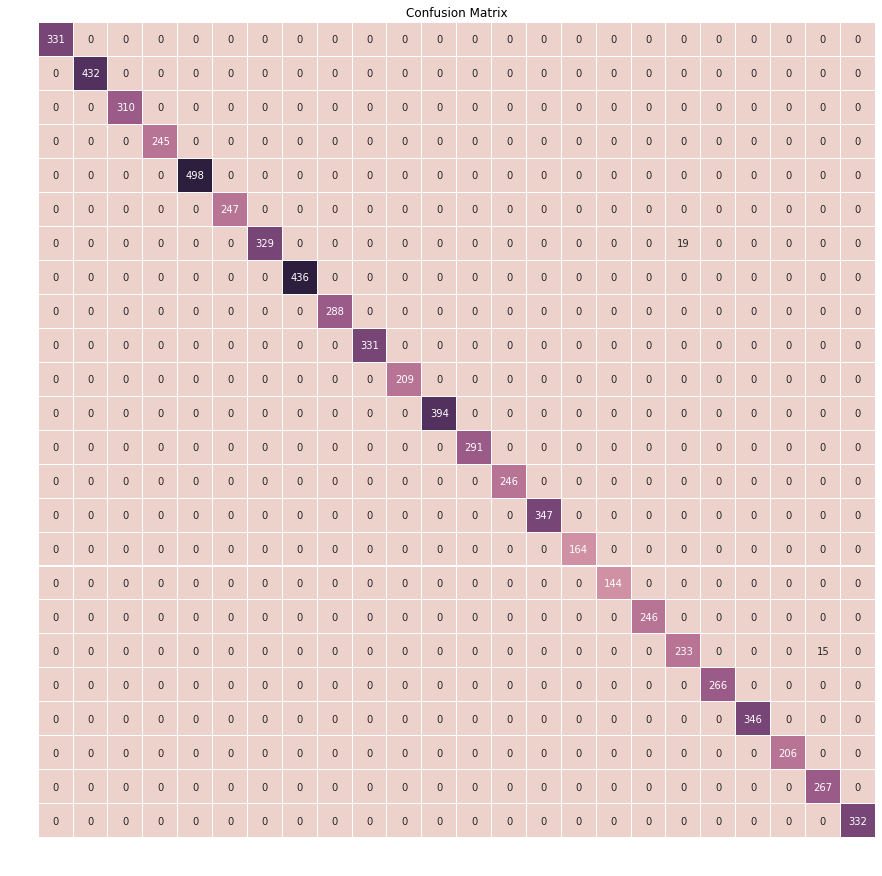

/home/sebastian/PycharmProjects/MLRobotics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Set')

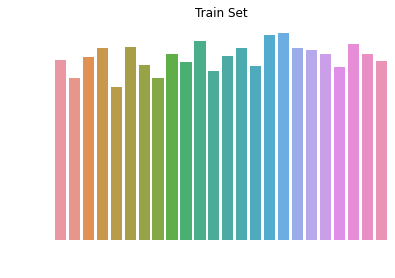

In [39]:
# PLOT ACCURACIES
f = plt.figure(figsize=(15, 5))
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# get the title property handler
title_obj = plt.title('training & validation accuracy')
plt.setp(title_obj, color='w')

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='evaluation accuracy')
plt.legend(loc='lower right')
axes.set_xlim([0.1, 10])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
axes = plt.gca()
if save_plots:
    plt.savefig('../plots/main_result.png',
                dpi=f.dpi,
                format='png',
                transparent=True)
plt.show()

# CLASSIFICATION REPORT
# deprecated warning
# y_pred = model.predict_classes(x_test, batch_size=32, verbose=1)
y_pred = np.argmax(model.predict(x_test), axis=-1)
for i in range(len(y_pred)):
    if y_pred[i] >= 9:
        y_pred[i] += 1
classes = [i for i in range(25) if i != 9]
classes_names = ["Class " + str(i) for i in classes]
print(classification_report(y, y_pred, target_names=classes_names))

# CONFUSION MATRIX
confusion_mtx = confusion_matrix(y_true=y,
                                 y_pred=y_pred,
                                 normalize=None)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=confusion_mtx,
            annot=True,
            linewidths=0.01,
            cmap=sns.cubehelix_palette(8),
            fmt='d',
            cbar=False,
            ax=ax,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
sns.countplot(train['label']).set_title('Train Set')
